In [1]:
%matplotlib inline
import qiskit
import time
from qiskit import IBMQ
from qiskit import Aer

# Authenticate an account and add for use during this session. Replace string
# argument with your private token.
IBMQ.enable_account("INSERT_YOUR_API_TOKEN_HERE")


/Users/corbett/Documents/Mastering-Quantum-Computing-with-IBM-QX/book/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


# Quantum OR, AND necessary for 3SAT implementation

In [2]:
import matplotlib
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from  qiskit.tools.visualization  import circuit_drawer
from qiskit.extensions.standard import ccx

def setup_input(qr,qc,a,b,c,d=None):
    if a:
        qc.x(qr[0])
    if b:
        qc.x(qr[1])
    if c:
        qc.x(qr[2])
    if d:
        qc.x(qr[4])

def quantumand_3(qr,qc,w,x,y,t1,t2):
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.ccx(qr[y],qr[t1],qr[t2])
    return t2


def quantumand_2(qr,qc,w,x,t1):
    qc.ccx(qr[w],qr[x],qr[t1])
    return t1

def quantumor_2(qr,qc,w,x,t1):
    qc.x(qr[w])
    qc.x(qr[x])
    qc.x(qr[t1])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[w])
    qc.x(qr[x])
    return t1

def quantumor_2_reverse(qr,qc,w,x,t1):
    qc.x(qr[x])
    qc.x(qr[w])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[t1])
    qc.x(qr[x])
    qc.x(qr[w])
    return t1

def quantumor_3(qr,qc,w,x,y,t1,t2):
    qc.x(qr[w])
    qc.x(qr[x])
    qc.x(qr[t1])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[w])
    qc.x(qr[x])

    qc.x(qr[y])
    qc.x(qr[t1])
    qc.x(qr[t2])
    qc.ccx(qr[y],qr[t1],qr[t2])
    qc.x(qr[y])
    qc.x(qr[t1])
    return t2

def quantumor_3_reverse(qr,qc,w,x,y,t1,t2):
    qc.x(qr[t1])
    qc.x(qr[y])
    qc.ccx(qr[y],qr[t1],qr[t2])
    qc.x(qr[t2])
    qc.x(qr[t1])
    qc.x(qr[y])
    
    qc.x(qr[x])
    qc.x(qr[w])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[t1])
    qc.x(qr[x])
    qc.x(qr[w])
    return t2

## Testing quantum logic functions

In [3]:
import itertools
def run_local_sim_one_result(qc):
    backend = Aer.get_backend('qasm_simulator')
    job_exp = qiskit.execute(qc,backend=backend)
    result = job_exp.result()
    final=result.get_counts(qc)
    result_in_order=list(final.keys())[0][::-1]
    return result_in_order

def test_logic_function_2(f,frev):
    print("inputs","forward","reverse")
    print("abc","a'b'c'","a''b''c''")
    for combo in itertools.product([0,1],repeat=3):
        # forward
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit(qr,cr)
        setup_input(qr,qc,combo[0],combo[1],combo[2])
        f(qr,qc,0,1,2)
        for i in range(3):
            qc.measure(qr[i],cr[i])
        forward_result=run_local_sim_one_result(qc)
        # forward then reverse
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit(qr,cr)
        setup_input(qr,qc,combo[0],combo[1],combo[2])
        f(qr,qc,0,1,2)
        frev(qr,qc,0,1,2)
        for i in range(3):
            qc.measure(qr[i],cr[i])
        reverse_result=run_local_sim_one_result(qc)
        print('%d%d%d %s %s'%(combo[0],combo[1],combo[2],forward_result,reverse_result))

        

def test_logic_function_3(f,frev):
    print("inputs","forward","reverse")
    print("abcd","a'b'c'd'","a''b''c''d''")
    for combo in itertools.product([0,1],repeat=4):
        # forward
        qr = QuantumRegister(5)
        cr = ClassicalRegister(5)
        qc = QuantumCircuit(qr,cr)
        setup_input(qr,qc,combo[0],combo[1],combo[2],combo[3])
        f(qr,qc,0,1,2,3,4)
        for i in range(5):
            qc.measure(qr[i],cr[i])
        forward_result=run_local_sim_one_result(qc)
        # forward then reverse
        qr = QuantumRegister(5)
        cr = ClassicalRegister(5)
        qc = QuantumCircuit(qr,cr)
        setup_input(qr,qc,combo[0],combo[1],combo[2],combo[3])
        f(qr,qc,0,1,2,3,4)
        frev(qr,qc,0,1,2,3,4)
        for i in range(5):
            qc.measure(qr[i],cr[i])
        reverse_result=run_local_sim_one_result(qc)
        
        forward_result=forward_result[0:3]+forward_result[4]
        reverse_result=reverse_result[0:3]+reverse_result[4]

        print('%d%d%d%d %s %s'%(combo[0],combo[1],combo[2],combo[3],forward_result,reverse_result))

print("Testing two qubit quantum AND")
test_logic_function_2(quantumand_2,quantumand_2)
print()

print("Testing two qubit quantum OR")
test_logic_function_2(quantumor_2,quantumor_2_reverse)
print()

print("Testing three qubit quantum AND")
test_logic_function_3(quantumand_3,quantumand_3)
print()

print("Testing three qubit quantum OR")
test_logic_function_3(quantumor_3,quantumor_3_reverse)


    

Testing two qubit quantum AND
inputs forward reverse
abc a'b'c' a''b''c''
000 000 000
001 001 001
010 010 010
011 011 011
100 100 100
101 101 101
110 111 110
111 110 111

Testing two qubit quantum OR
inputs forward reverse
abc a'b'c' a''b''c''
000 000 000
001 001 001
010 011 010
011 010 011
100 101 100
101 100 101
110 111 110
111 110 111

Testing three qubit quantum AND
inputs forward reverse
abcd a'b'c'd' a''b''c''d''
0000 0000 0000
0001 0001 0001
0010 0010 0010
0011 0011 0011
0100 0100 0100
0101 0101 0101
0110 0110 0110
0111 0111 0111
1000 1000 1000
1001 1001 1001
1010 1010 1010
1011 1011 1011
1100 1100 1100
1101 1101 1101
1110 1111 1111
1111 1110 1110

Testing three qubit quantum OR
inputs forward reverse
abcd a'b'c'd' a''b''c''d''
0000 0000 0000
0001 0001 0001
0010 0011 0010
0011 0010 0011
0100 0101 0100
0101 0100 0101
0110 0111 0110
0111 0110 0111
1000 1001 1000
1001 1000 1001
1010 1011 1010
1011 1010 1011
1100 1101 1100
1101 1100 1101
1110 1111 1110
1111 1110 1111


# Test classical logic of function
$$(a \lor b \lor \neg c) \land (a \lor b \lor c) \land (a \lor \neg b \lor c) \land (a \lor \neg b \lor \neg c) \land (\neg a \lor b \lor \neg c) \land (\neg a \lor b \lor c) \land (\neg a \lor \neg b \lor \neg c) $$

In [4]:
def _3sat_mystery3_classical(a,b,c):
    return int((a or b or not c) and (a or b or c) and (a or not b or c) and (a or not b or not c) and (not a or b or not c)  and (not a or b or c) and (not a or not b or not c) )
for combo in itertools.product([0,1],repeat=3):
    print(combo,'->',_3sat_mystery3_classical(combo[0],combo[1], combo[2]))

(0, 0, 0) -> 0
(0, 0, 1) -> 0
(0, 1, 0) -> 0
(0, 1, 1) -> 0
(1, 0, 0) -> 0
(1, 0, 1) -> 0
(1, 1, 0) -> 1
(1, 1, 1) -> 0


# 3SAT implementation for our choice of 3SAT problem

In [5]:
def setup_or_teardown_logic(qr,qc,is_a,is_b,is_c): 
    """    
    is_a,is_b,and is_c: False indicates the variable should be negated, True left as is.
    Negation is done with the X gate.

    """    
    if not is_a:
        qc.x(qr[0])
    if not is_b:
        qc.x(qr[1])
    if not is_c:
        qc.x(qr[2])

In [6]:
def _3sat_mystery_3(qr,qc,reverse=True,full_reverse=False):
    # w,x,y in registers 0,1,2. 
    # Everything else can be temp/results
    # General pattern
    # 1. setup logic (which of a,b,c are negated)
    # 2. execute computation
    # 3. reverse logic so that we are back to a,b,c without negations
    # If this circuit is doing its job, should only be satisfied by 110

    # (a or b or not c)
    setup_or_teardown_logic(qr,qc,True,True,False)
    first_clause=quantumor_3(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,True,True,False)

    # (a or b or c) 
    setup_or_teardown_logic(qr,qc,True,True,True)
    second_clause=quantumor_3(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,True,True,True)

    # (a or not b or c)
    setup_or_teardown_logic(qr,qc,True,False,True)
    third_clause=quantumor_3(qr,qc,0,1,2,7,8)
    setup_or_teardown_logic(qr,qc,True,False,True)

    # (a or not b or not c)
    setup_or_teardown_logic(qr,qc,True,False,False)
    fourth_clause=quantumor_3(qr,qc,0,1,2,9,10)
    setup_or_teardown_logic(qr,qc,True,False,False)

    # (not a or b or not c) 
    setup_or_teardown_logic(qr,qc,False,True,False)
    fifth_clause=quantumor_3(qr,qc,0,1,2,11,12)
    setup_or_teardown_logic(qr,qc,False,True,False)

    # (not a or b or c)
    setup_or_teardown_logic(qr,qc,False,True,True)
    sixth_clause=quantumor_3(qr,qc,0,1,2,13,14)
    setup_or_teardown_logic(qr,qc,False,True,True)

    # (not a or not b or not c) 
    setup_or_teardown_logic(qr,qc,False,False,False)
    seventh_clause=quantumor_3(qr,qc,0,1,2,15,16)
    setup_or_teardown_logic(qr,qc,False,False,False)


    # Let's whittle down
    intermediate_and_pair1=quantumand_2(qr,qc,first_clause,second_clause,17)
    intermediate_and_pair2=quantumand_2(qr,qc,third_clause,fourth_clause,18)
    intermediate_and_pair3=quantumand_2(qr,qc,fifth_clause,sixth_clause,19)

    # Now whittling down further
    intermediate_and_pair_12=quantumand_2(qr,qc,intermediate_and_pair1,intermediate_and_pair2,20)
    intermediate_and_pair_34=quantumand_2(qr,qc,intermediate_and_pair3,seventh_clause,21)

    # Now whittling down to 1 result
    final_result_and_pair_1234=quantumand_2(qr,qc,intermediate_and_pair_12,intermediate_and_pair_34,22)
    
    if reverse:
        if full_reverse:
            final_result_and_pair_1234=quantumand_2(qr,qc,intermediate_and_pair_12,intermediate_and_pair_34,22)
        intermediate_and_pair_34=quantumand_2(qr,qc,intermediate_and_pair3,seventh_clause,21)
        intermediate_and_pair_12=quantumand_2(qr,qc,intermediate_and_pair1,intermediate_and_pair2,20)
        intermediate_and_pair3=quantumand_2(qr,qc,fifth_clause,sixth_clause,19)
        intermediate_and_pair2=quantumand_2(qr,qc,third_clause,fourth_clause,18)
        intermediate_and_pair1=quantumand_2(qr,qc,first_clause,second_clause,17)
        # (not a or not b or not c) 
        setup_or_teardown_logic(qr,qc,False,False,False)
        seventh_clause=quantumor_3_reverse(qr,qc,0,1,2,15,16) 
        setup_or_teardown_logic(qr,qc,False,False,False)
        # (not a or b or c)
        setup_or_teardown_logic(qr,qc,False,True,True)
        sixth_clause=quantumor_3_reverse(qr,qc,0,1,2,13,14)
        setup_or_teardown_logic(qr,qc,False,True,True)
        # (not a or b or not c) 
        setup_or_teardown_logic(qr,qc,False,True,False)
        fifth_clause=quantumor_3_reverse(qr,qc,0,1,2,11,12)
        setup_or_teardown_logic(qr,qc,False,True,False)
        # (a or not b or not c)
        setup_or_teardown_logic(qr,qc,True,False,False)
        fourth_clause=quantumor_3_reverse(qr,qc,0,1,2,9,10)
        setup_or_teardown_logic(qr,qc,True,False,False)
        # (a or not b or c)
        setup_or_teardown_logic(qr,qc,True,False,True)
        third_clause=quantumor_3_reverse(qr,qc,0,1,2,7,8)
        setup_or_teardown_logic(qr,qc,True,False,True)
        # (a or b or c) 
        setup_or_teardown_logic(qr,qc,True,True,True)
        second_clause=quantumor_3_reverse(qr,qc,0,1,2,5,6)
        setup_or_teardown_logic(qr,qc,True,True,True)
        # (a or b or not c)
        setup_or_teardown_logic(qr,qc,True,True,False)
        first_clause=quantumor_3_reverse(qr,qc,0,1,2,3,4)
        setup_or_teardown_logic(qr,qc,True,True,False)

# Testing all combinations of our quantum implementation on IBM QX

In [7]:
import time
from qiskit.tools.visualization import plot_histogram
def try_input_combination(input_combination,shots=1,reverse=False,full_reverse=True):
    
    backend = IBMQ.get_backend('ibmq_qasm_simulator') # remote simulator
    qr = QuantumRegister(23)
    cr = ClassicalRegister(23)
    qc = QuantumCircuit(qr,cr)
    # setting up the input
    for i in range(3):
        if input_combination[i]:
            qc.x(qr[i])
    # calling the function on that input
    _3sat_mystery_3(qr,qc,reverse=reverse,full_reverse=full_reverse)
    # measuring every qubit as we will want to verify reversibility 
    for i in range(23):
        qc.measure(qr[i],cr[i])

    # Executing the job on IBM QX
    job_exp = qiskit.execute(qc, backend=backend,shots=shots)
    result = job_exp.result()
    final=result.get_counts(qc)
    if not len(final)==1:
        print(input_combination,final)
    else:
        # note that due to IBM's choice the result returned is in opposite order with last register coming first 
        # and the first register coming last. For clarity we reverse the output so the first register is first
        # and the last register is last.

        result_in_order=list(final.keys())[0][::-1]
        print(input_combination,'->',result_in_order[-1],'(measured bits: '+result_in_order+')')

## Without reverse. 
Since this has no reverse, it should output 1 only for the input 1,1,0. Then the other bits should be set to a variety of elements which correspond to the temporary results from each clause.

In [8]:
import itertools
for combo in itertools.product([0,1],repeat=3):
    try_input_combination(combo)


(0, 0, 0) -> 0 (measured bits: 00001001111111111011010)
(0, 0, 1) -> 0 (measured bits: 00100011111111111011010)
(0, 1, 0) -> 0 (measured bits: 01011110001111111101010)
(0, 1, 1) -> 0 (measured bits: 01111110100111111101010)
(1, 0, 0) -> 0 (measured bits: 10011111111010011110100)
(1, 0, 1) -> 0 (measured bits: 10111111111000111110100)
(1, 1, 0) -> 1 (measured bits: 11011111111111101111111)
(1, 1, 1) -> 0 (measured bits: 11111111111111100111100)


## With reverse. 
Since this has reverse, it should output 0 for all inputs (that is the last bit should always be zero). Then, after the input, the other bits should all be set to zero as well.

In [9]:
import itertools
for combo in itertools.product([0,1],repeat=3):
    try_input_combination(combo,reverse=True,full_reverse=True)

(0, 0, 0) -> 0 (measured bits: 00000000000000000000000)
(0, 0, 1) -> 0 (measured bits: 00100000000000000000000)
(0, 1, 0) -> 0 (measured bits: 01000000000000000000000)
(0, 1, 1) -> 0 (measured bits: 01100000000000000000000)
(1, 0, 0) -> 0 (measured bits: 10000000000000000000000)
(1, 0, 1) -> 0 (measured bits: 10100000000000000000000)
(1, 1, 0) -> 0 (measured bits: 11000000000000000000000)
(1, 1, 1) -> 0 (measured bits: 11100000000000000000000)


## With partial reverse
Here we reverse all bits except the final bit, which will be set to 1 only for the input which satisfies teh function

In [10]:
import itertools
for combo in itertools.product([0,1],repeat=3):
    try_input_combination(combo,reverse=True,full_reverse=False)

(0, 0, 0) -> 0 (measured bits: 00000000000000000000000)
(0, 0, 1) -> 0 (measured bits: 00100000000000000000000)
(0, 1, 0) -> 0 (measured bits: 01000000000000000000000)
(0, 1, 1) -> 0 (measured bits: 01100000000000000000000)
(1, 0, 0) -> 0 (measured bits: 10000000000000000000000)
(1, 0, 1) -> 0 (measured bits: 10100000000000000000000)
(1, 1, 0) -> 1 (measured bits: 11000000000000000000001)
(1, 1, 1) -> 0 (measured bits: 11100000000000000000000)


# Grover's algorithm 

In [11]:
def grovers_algorithm(checker,num_inputs,num_registers,num_iterations=None):
    if num_iterations == None:
        from math import floor,sqrt
        iterations=floor(sqrt(2**num_inputs))
    else:
        iterations=num_iterations
    print("Running Grover's algorithm for %d iterations"%iterations)
    qr = QuantumRegister(num_registers)
    cr = ClassicalRegister(num_registers)
    qc = QuantumCircuit(qr,cr)
    # Configuring the input
    for i in range(num_inputs):
        qc.h(qr[i])
    # Setting up the output of the checker function
    qc.x(qr[num_registers-1])
    qc.h(qr[num_registers-1])
    
    # Do the Grovers steps
    for it in range(iterations):
        checker(qr,qc)
        mover(qr,qc,num_inputs)
    # Measure the inputs
    for j in range(num_inputs):
        qc.measure(qr[j], cr[j])
    return cr,qr,qc

    
def control_Z(qr,qc,num_inputs):
    if num_inputs not in [2,3]:
        raise Exception("currently only supports 2 or 3 inputs")
    if num_inputs==2:
        qc.h(qr[1])
        qc.cx(qr[0],qr[1])
        qc.h(qr[1])
    elif num_inputs==3:
        qc.h(qr[2])
        qc.ccx(qr[0],qr[1],qr[2])    
        qc.h(qr[2])
    
def mover(qr,qc,num_inputs):
    if num_inputs not in [2,3]:
        raise Exception("currently only supports 2 or 3 inputs")
    for i in range(num_inputs):
        qc.h(qr[i])
    for i in range(num_inputs): # D matrix
        qc.x(qr[i]) 
    control_Z(qr,qc,num_inputs)
    for i in range(num_inputs):
        qc.x(qr[i])
    for i in range(num_inputs):
        qc.h(qr[i])

# Running Grover's algorithm

In [22]:
def run_3sat_mystery_grover_ibm_sim(num_iterations=None,backend=None):
    if not backend:
        backend=IBMQ.get_backend('ibmq_qasm_simulator')
    import time
    from qiskit.tools.visualization import plot_histogram
    shots=50
    cr,qr,qc = grovers_algorithm(_3sat_mystery_3,3,23,num_iterations=num_iterations)
    job_exp = qiskit.execute(qc, backend=backend,shots=shots)
    result = job_exp.result()
    final=result.get_counts(qc)
    print(final)
    return final

Zero iterations!

Running Grover's algorithm for 0 iterations
{'00000000000000000000101': 11, '00000000000000000000011': 4, '00000000000000000000100': 8, '00000000000000000000111': 5, '00000000000000000000001': 1, '00000000000000000000110': 8, '00000000000000000000000': 6, '00000000000000000000010': 7}


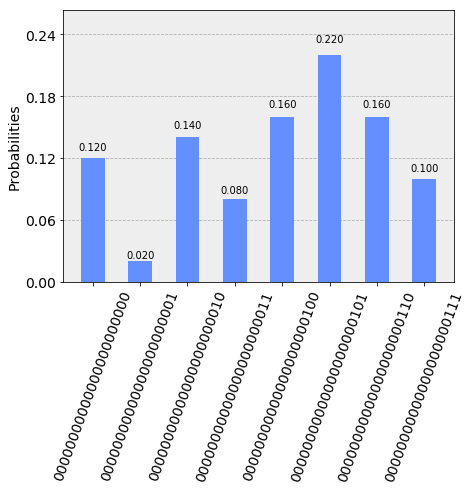

In [23]:
final=run_3sat_mystery_grover_ibm_sim(num_iterations=0)
plot_histogram(final)

Calling with no arguments will default to calculating the optimum number of iterations based on the number of inputs (3). In this case that will be 2.

Running Grover's algorithm for 2 iterations
{'00000000000000000000011': 50}


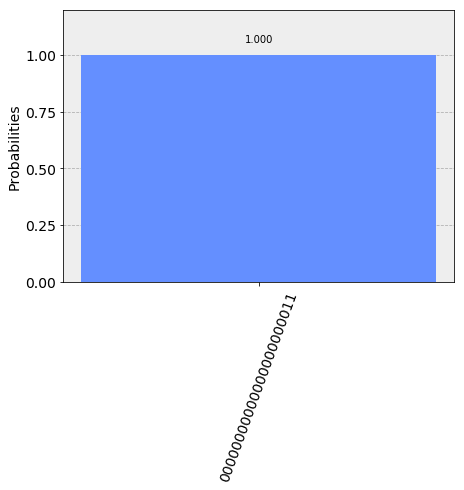

In [24]:
final=run_3sat_mystery_grover_ibm_sim()
plot_histogram(final)

Only one iteration!

Running Grover's algorithm for 1 iterations
{'00000000000000000000001': 2, '00000000000000000000101': 1, '00000000000000000000011': 42, '00000000000000000000100': 2, '00000000000000000000000': 1, '00000000000000000000111': 1, '00000000000000000000010': 1}


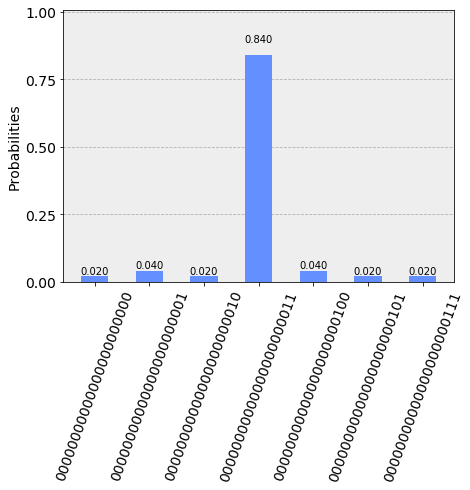

In [25]:
final=run_3sat_mystery_grover_ibm_sim(num_iterations=1)
plot_histogram(final)

Three iterations! (this is one too many, and the solution starts to degrade). It will oscillate and improve again later.

Running Grover's algorithm for 3 iterations
{'00000000000000000000101': 3, '00000000000000000000011': 16, '00000000000000000000100': 9, '00000000000000000000111': 4, '00000000000000000000001': 7, '00000000000000000000110': 2, '00000000000000000000000': 7, '00000000000000000000010': 2}


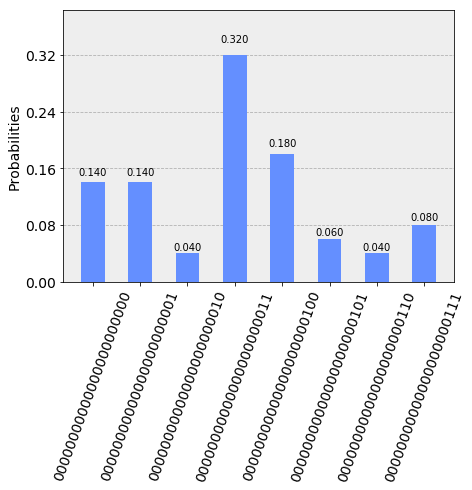

In [26]:
final=run_3sat_mystery_grover_ibm_sim(num_iterations=3)
plot_histogram(final)

IBM QX has a maximum length of the circuit it hits, which we reach for 4 or more iterations. 